In [2]:
import pickle
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pickle
from gplearn.genetic import SymbolicRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from io import StringIO
from IPython.display import Image

In [3]:
dataset= r'TrainTest_Elemental+Matminer.csv'
data=pd.DataFrame(pd.read_csv(dataset))

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
all_Data=data.iloc[:,:]
global corMat
corMat = pd.DataFrame(all_Data.corr())  #corr 求相关系数矩阵
corMat.to_csv('./outputs/heatmap-before.csv')
plt.figure(figsize=(20, 30))
sns.heatmap(corMat, annot=False, vmax=1, square=True, cmap="Blues",linewidths=0)
plt.savefig('./outputs/heatmap-before.png', dpi=300, bbox_inches = 'tight')
plt.close()

In [5]:
# 使用随机森林的rfe:RandomForestRegressor()
from sklearn import preprocessing
from sklearn.feature_selection import RFE, RFECV
from sklearn.ensemble import RandomForestRegressor
import csv
import numpy as np

# 输入数据归一化
X = data.values[:, :-1]
for i in range(X.shape[1]):
    X[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X[:, [i]])
y = data.values[:, -1]  # 目标数值

# rfe步骤
remain_number = 40
model = RandomForestRegressor()
rfe = RFE(estimator=model, n_features_to_select=remain_number, step=1)
rfe_X = rfe.fit_transform(X, y)
print("Whether features are selected：\n", rfe.support_)                                          # ndarray
print("Feature size:", rfe_X.shape)                                           # tuple
list1 = rfe.support_.tolist()

# 打印rfe后的特征，但可能包含空值
import pandas as pd
Features_0 = pd.DataFrame(data=data.iloc[:, :-1].columns, columns=['Features'])
Features_0
Features_rfe = pd.DataFrame(data=rfe.support_, columns=['whether selected'])
Features_rfe
#     pd.options.display.max_rows=None
p = pd.concat([Features_0, Features_rfe], axis=1)
q = p[p['whether selected']>0]
r = q.reset_index(drop=True)
global s_rfe
s_rfe = pd.DataFrame(data=data,columns=r.Features.values)
global target
target = pd.DataFrame(data=data.iloc[:,-1])
# target = pd.DataFrame(data, columns=['Potential (v)'])
global data_rfe
data_rfe = pd.concat([s_rfe,target], axis=1)
print("Final features (s_rfe):", r.Features.values)                                        # ndarray
print("target:", target)
print("data after rfe feature selection (data_rfe):", data_rfe)

list2 = r.Features.values.tolist()

# print全输出
with open("data.txt", "w") as f:
    #f.write("特征是否被选中：\n")
    f.write("Whether the feature is selected:\n")
    for i in range(len(list1)):
        f.write(str(list1[i])+' ')
    #f.write("\n获取的数据特征尺寸：\n")
    f.write("\nAcquired data feature size:\n")
    f.write('(%s,%s)' % rfe_X.shape)
    #f.write("\n最后的特征s_rfe：\n")
    f.write("\nS_rfe(Final feature)：\n")
    for i in range(len(list2)):
        f.write(str(list2[i]) + '\n')
target.to_csv("target.csv")
data_rfe.to_csv("data_rfe.csv")

Whether features are selected：
 [ True False False False False  True  True  True  True False False False
 False False  True  True  True False False False False  True False False
  True  True False False False  True  True  True False  True False False
  True False False  True  True False False False False False  True  True
  True  True False False False  True  True  True False  True  True False
 False False  True  True  True  True False  True False  True False  True
  True  True  True False False False False False False False False  True
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False 

In [6]:
data_rfe

,A1 NumberofProtons,X3 NumberofProtons,X4 NumberofProtons,Ion NumberofProtons,A1 NumberofNeutrons,X4 NumberofNeutrons,Ion NumberofNeutrons,A1 Number of Shells,X3 Number of Shells,A1 Specific Heat,...,X1 Melting Point,X3 Melting Point,Ion Melting Point,Without ion Final Energy(ev),With ion Final Energy(ev),Ion Energy(ev),8,16,52,Adsorption energy(ev)
0,3,9,9,3,4,10,4,2,2,3.582,...,53.63,53.63,453.85,-5587.936867,-5794.989672,-200.0479,0.571429,0.000000,0.000000,-7.004905
1,3,9,9,30,4,10,35,2,2,3.582,...,53.63,53.63,692.88,-5587.936867,-7623.125935,-2035.5843,0.571429,0.000000,0.000000,0.395232
2,3,9,9,19,4,10,20,2,2,3.582,...,53.63,53.63,336.50,-5587.936867,-6384.870656,-790.3531,0.571429,0.000000,0.000000,-6.580689
3,3,9,9,11,4,10,12,2,2,3.582,...,53.63,53.63,371.15,-5587.936867,-6897.675262,-1304.1810,0.571429,0.000000,0.000000,-5.557395
4,3,9,9,13,4,10,14,2,2,3.582,...,53.63,53.63,933.40,-5587.936867,-5692.458630,-107.1302,0.571429,0.000000,0.000000,2.608437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,37,53,53,11,48,74,12,5,5,0.363,...,266.05,386.65,371.15,-5874.601158,-7180.716513,-1304.1810,0.000000,0.285714,0.285714,-1.934356
636,37,53,53,13,48,74,14,5,5,0.363,...,266.05,386.65,933.40,-5874.601158,-5981.882426,-107.1302,0.000000,0.285714,0.285714,-0.151069
637,37,53,53,20,48,74,20,5,5,0.363,...,266.05,386.65,1112.15,-5874.601158,-6881.698353,-1002.3398,0.000000,0.285714,0.285714,-4.757395
638,37,53,53,12,48,74,12,5,5,0.363,...,266.05,386.65,923.15,-5874.601158,-7563.354657,-1688.2915,0.000000,0.285714,0.285714,-0.462000


In [7]:
s_rfe

,A1 NumberofProtons,X3 NumberofProtons,X4 NumberofProtons,Ion NumberofProtons,A1 NumberofNeutrons,X4 NumberofNeutrons,Ion NumberofNeutrons,A1 Number of Shells,X3 Number of Shells,A1 Specific Heat,...,A2 Melting Point,X1 Melting Point,X3 Melting Point,Ion Melting Point,Without ion Final Energy(ev),With ion Final Energy(ev),Ion Energy(ev),8,16,52
0,3,9,9,3,4,10,4,2,2,3.582,...,453.85,53.63,53.63,453.85,-5587.936867,-5794.989672,-200.0479,0.571429,0.000000,0.000000
1,3,9,9,30,4,10,35,2,2,3.582,...,453.85,53.63,53.63,692.88,-5587.936867,-7623.125935,-2035.5843,0.571429,0.000000,0.000000
2,3,9,9,19,4,10,20,2,2,3.582,...,453.85,53.63,53.63,336.50,-5587.936867,-6384.870656,-790.3531,0.571429,0.000000,0.000000
3,3,9,9,11,4,10,12,2,2,3.582,...,453.85,53.63,53.63,371.15,-5587.936867,-6897.675262,-1304.1810,0.571429,0.000000,0.000000
4,3,9,9,13,4,10,14,2,2,3.582,...,453.85,53.63,53.63,933.40,-5587.936867,-5692.458630,-107.1302,0.571429,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,37,53,53,11,48,74,12,5,5,0.363,...,312.79,266.05,386.65,371.15,-5874.601158,-7180.716513,-1304.1810,0.000000,0.285714,0.285714
636,37,53,53,13,48,74,14,5,5,0.363,...,312.79,266.05,386.65,933.40,-5874.601158,-5981.882426,-107.1302,0.000000,0.285714,0.285714
637,37,53,53,20,48,74,20,5,5,0.363,...,312.79,266.05,386.65,1112.15,-5874.601158,-6881.698353,-1002.3398,0.000000,0.285714,0.285714
638,37,53,53,12,48,74,12,5,5,0.363,...,312.79,266.05,386.65,923.15,-5874.601158,-7563.354657,-1688.2915,0.000000,0.285714,0.285714


In [8]:
target

,Adsorption energy(ev)
0,-7.004905
1,0.395232
2,-6.580689
3,-5.557395
4,2.608437
...,...
635,-1.934356
636,-0.151069
637,-4.757395
638,-0.462000


In [9]:
X = data_rfe.values[:, :-1]
y = data_rfe.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)


for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])



for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [18]:
feature_names = list(data_rfe.columns[:-1])

In [19]:
# 定义符号回归模型，并使用训练数据拟合模型
reg = SymbolicRegressor(population_size=5000, generations=20, verbose=1,
                         function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 
                                       'inv', 'max', 'min', 'sin', 'cos', 'tan'],
                         metric='mean absolute error', stopping_criteria=0.001,
                         random_state=0)
reg.fit(X_train, y_train)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     8.26          4.08205        9          2.20372              N/A     28.27s
   1     7.14          3.03849        4          2.11879              N/A     28.90s
   2     9.23          2.91442       13          2.00081              N/A     27.21s
   3     7.97          2.73231       19          1.92609              N/A     24.82s
   4    12.37          2.56363       37           1.7733              N/A     25.76s
   5    14.58          2.25418       32          1.68617              N/A     23.96s
   6    19.15          2.25056       24          1.51325              N/A     23.46s
   7    24.12          2.17276       25           1.4889              N/A     22.43s
   8    28.93          2.22303       31          1.45072              N/A  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'abs', 'neg', 'inv', 'max', 'min', 'sin', 'cos',
                                'tan'],
                  population_size=5000, random_state=0, stopping_criteria=0.001,
                  verbose=1)

In [20]:
from sklearn.metrics import mean_absolute_error
# 预测测试数据
y_pred = reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 1.0102137159109361


In [21]:
print(X_test.shape[1])

40


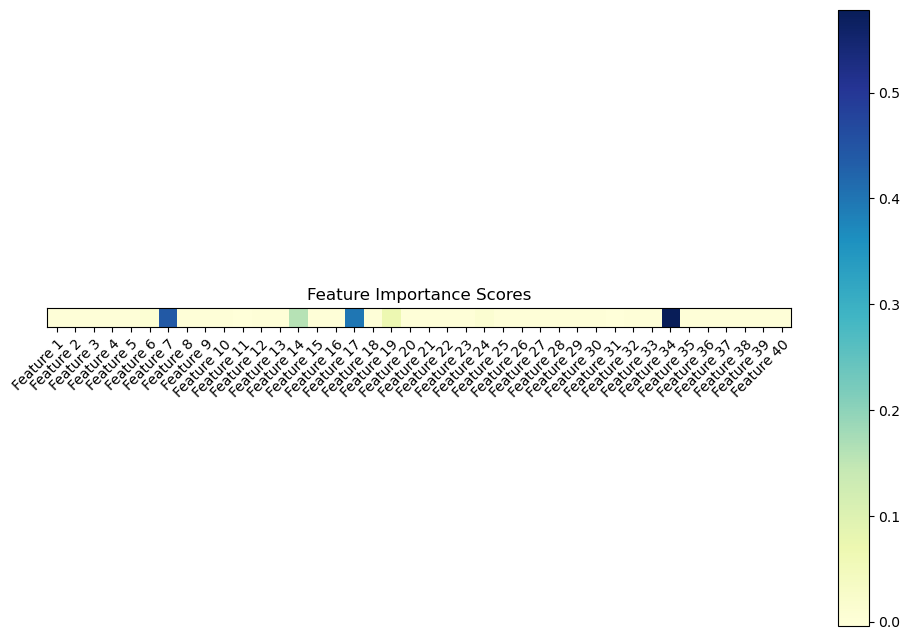

In [22]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Get feature-importance scores
result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=0)

# Create a heatmap
fig, ax = plt.subplots(figsize=(12,8))
im = ax.imshow(result.importances_mean.reshape(1, -1), cmap='YlGnBu')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set tick labels
ax.set_xticks(np.arange(len(result.importances_mean)))
ax.set_xticklabels([f"Feature {i+1}" for i in range(len(result.importances_mean))])
ax.set_yticks([])

# Rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Set plot title and show plot
ax.set_title("Feature Importance Scores")
plt.show()
# 这个代码会创建一个热力图，显示特征重要性分数。
# x轴显示特征编号，每个单元格的颜色表示该特征的重要性分数，颜色越亮，意味着该特征对该模型越重要。

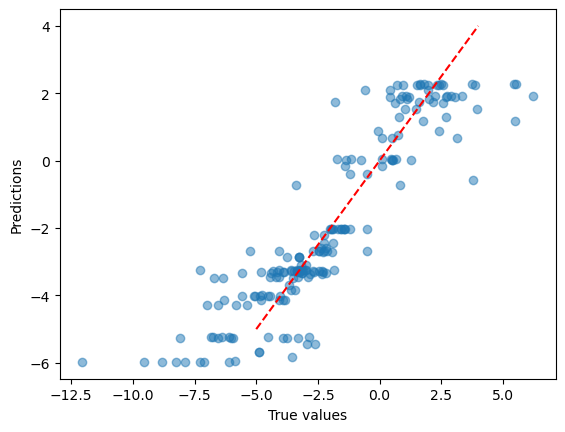

In [24]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot(range(-5, 5), range(-5, 5), "r--")
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()
# 这个代码会创建一个散点图，显示模型的预测值与真实值之间的关系。
# x轴是真实值，y轴是预测值。如果模型预测完全准确，则所有点都将落在红色虚线上方，红色虚线表示完美预测的情况

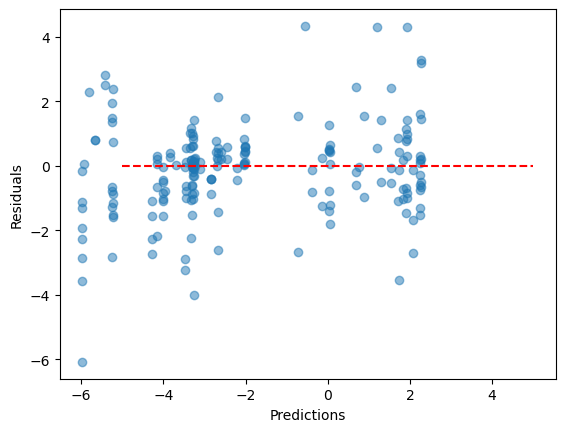

In [25]:
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.hlines(y=0, xmin=-5, xmax=5, colors='r', linestyles='--')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()
# 这个代码将创建一个散点图，表示预测值和残差之间的关系。
# x轴是预测值，y轴是残差。如果模型的预测值能够准确地预测目标变量，残差应该随机分布在0附近。